In [7]:
#importing the libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
def image_plot(image):
    '''
     This function take the image and plot it 
     '''
    plt.figure(figsize =(7,7))
    plt.imshow(image,"gray")

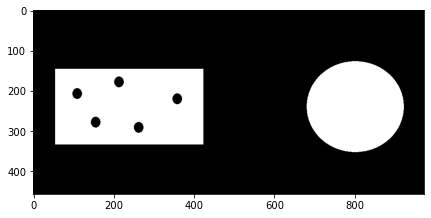

In [13]:
#loading the image as gray scale image
image = cv2.imread("thresh.PNG",0)

#applying the Inverse binary thresholding
ret,image = cv2.threshold(image,152,255,cv2.THRESH_BINARY_INV)
image_plot(image)

In [18]:
#findind the contours in the image
contours, hier =cv2.findContours(image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [19]:
# gives the number of contours detected
len(contours)

7

# External Contours

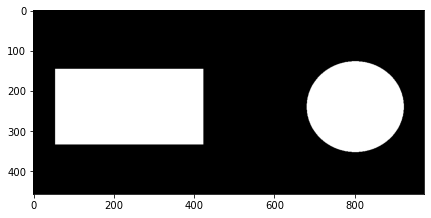

In [21]:
#creating a black image of same size
black_image = np.zeros(image.shape)

#running a for loop to draw all the contours
for i in range(len(contours)):
    
    if hier[0][i][3]==-1: #condition for external contours
        
        #function draws the detected contours
        cv2.drawContours(black_image, contours, i ,255,-1)
        
image_plot(black_image)

# Internal Contours

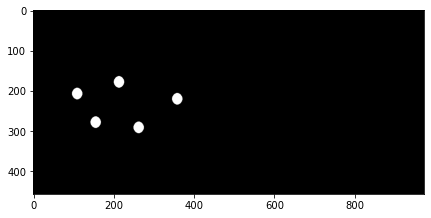

In [22]:
#drawing the image
black_image = np.zeros(image.shape)

#running the for loop
for i in range(len(contours)):
    
    if hier[0][i][3]==0: #condition for internal contours
        cv2.drawContours(black_image, contours, i ,255,-1)
        
image_plot(black_image)

In [23]:
def detect(path):
    
    '''This function requires path of the image and it detects blue region in the photos'''
    
    #loading the image
    image = cv2.imread(path)
    
    #converting into HSV color channel
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    #setting lower color range
    lower = np.array([38,86,0])
    
    #setting higher color range
    higher = np.array([121,255,255])
    
    #converting into binary image
    mask =cv2.inRange(image, lower, higher)
    
    #finding the contours
    contours,hier = cv2.findContours(mask, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
    
    #reloading the same image
    image = cv2.imread(path)
    
    #converting into RGB color channel
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    #drawing the detected contours
    detect_mask = cv2.drawContours(image, contours,-1,(255,0,0),10)
    
    
    return detect_mask

In [24]:
#applying function on the image
image = detect("mask_man.jpg")

#plotting the image
image_plot(image)

# Real Time Contours detection

In [68]:
#capturing from webcam
cap = cv2.VideoCapture(0)

while True:
    #reading the frames
    _, frame = cap.read()
    
    #applying blurring on each frame
    blurred_frame = cv2.GaussianBlur(frame, (51,51),0)
    
    #converting it into hsv
    hsv = cv2.cvtColor(blurred_frame, cv2.COLOR_BGR2HSV)
    
    #defining the range for color
    lower = np.array([50,45,0])
    high = np.array([121,150,150])
    
    #converting into binary image
    mask = cv2.inRange(hsv, low, high)
    
    #finding all the contours
    contours,_= cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    
    #updating the contours with frames
    for contour in contours:
        cv2.drawContours(frame,contour,-1, (0,255,0),2)
    
    #showing the frame
    cv2.imshow("fame",frame)
    cv2.imshow("mask", mask)
    
        
     #Exit condition   
    if cv2.waitKey(1) & 0xFF ==27:
        break
    
#      
cap.release()
cv2.destroyAllWindows()